# Plot Plume Data

In [2]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import matplotlib.ticker as mticker
import math

%config InlineBackend.figure_formats = ['svg']

In [3]:
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 9.
plt.rcParams['lines.markeredgewidth'] = 0.7

In [4]:
main_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions\\'

# ra_path = ['1e4','1e5','1e6','1e7','1e8','1e9','1e10']

fname = os.path.join(main_path,'[!m]*')
fileL = glob.glob(fname) #list of files
fileL = [file.replace(main_path,'') for file in fileL]
[fileL.remove(file) for file in fileL if '_' in file]; [fileL.remove(file) for file in fileL if 'Plume' in file];
ra_path = sorted (fileL, key = lambda x: (len (x), x))

newColOrder = ['Ra','Depth','Q_p','dT_p']; Data = pd.DataFrame();

for i in range(len(ra_path)):    
    fname = os.path.join(main_path+ra_path[i]+'\\Plume Profiles','[!m]*.txt')
    fileL = glob.glob(fname) #list of files
    temp = []
    for file in fileL:
        a = fileL.index(file)
        b = pd.read_csv(file,header=None)
        b.rename(columns={0:a}, inplace=True)
        temp.append(b)
    c = b.copy()
    c.values[:] = ra_path[i]
    temp.append(c)

    my_data = pd.concat(temp, axis=1, join="inner",ignore_index=True)
    my_data.rename(columns={0:'dT_p',1:'Depth',3:'Ra',2:'Q_p'},inplace=True)
    my_data = my_data[newColOrder]
    Data = pd.concat([Data,my_data],ignore_index=True)

Data = Data.sort_values(by=['Ra','Depth'])
Data = Data.reset_index(drop=True)

In [5]:
Data

,Ra,Depth,Q_p,dT_p
0,1.000000e+04,0.010,0.003641,0.024938
1,1.000000e+04,0.050,0.082662,0.115111
2,1.000000e+04,0.100,0.252714,0.184971
3,1.000000e+04,0.150,0.395285,0.208607
4,1.000000e+04,0.200,0.476084,0.209262
...,...,...,...,...
1028,6.000000e+10,0.975,0.236850,0.033762
1029,6.000000e+10,0.980,0.147958,0.037634
1030,6.000000e+10,0.985,0.079594,0.042513
1031,6.000000e+10,0.990,0.059316,0.044392


In [6]:
RaU = Data.Ra.unique()
lenRa = len(RaU)

data = [[] for i in range(lenRa)] #empty nested list

for i in range(lenRa):
    data[i] = Data.loc[Data['Ra'] == RaU[i]]

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

For 3e6 I used 128, not 256. 256 looked weird

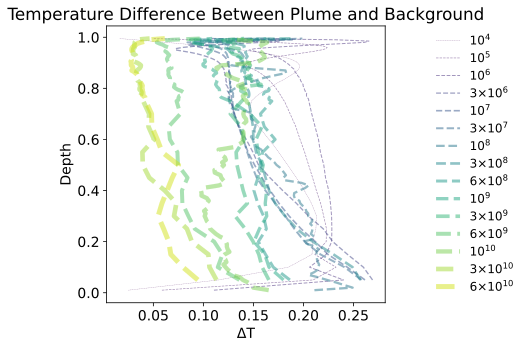

In [7]:
plt.figure();
cmap = plt.get_cmap('viridis');
for i in range(lenRa):
    plt.plot(data[i]['dT_p'],data[i]['Depth'],'--',label=('{}'.format(fmt(int(RaU[i])))),\
             color=cmap(i/lenRa),linewidth=(i+1)/3,alpha=0.5)
plt.ylabel('Depth')
plt.xlabel('ΔT');
plt.title('Temperature Difference Between Plume and Background');
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));
# plt.axhline(0.5,color='r');
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'deltaT_plume.png',pad_inches=0.1,bbox_inches='tight');

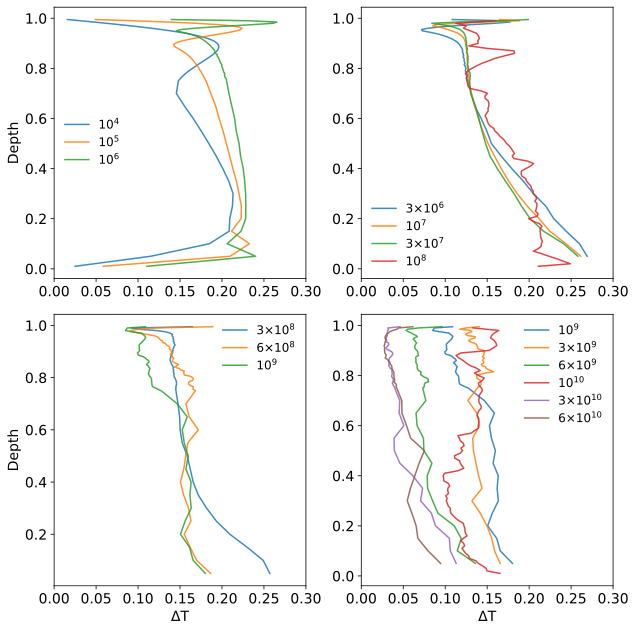

In [8]:
fig = plt.figure(figsize=(9,9))

selected = [0,1,2];
ax = plt.subplot(2, 2, 1)
for i in selected:
    plt.plot(data[i]['dT_p'],data[i]['Depth'],'-',label=('{}'.format(fmt(int(RaU[i])))),alpha=0.85)
plt.ylabel('Depth')
plt.legend(frameon=False,prop={'size': 12});
plt.xlim((0,0.3))

selected = [3,4,5,6];
ax = plt.subplot(2, 2,2)
for i in selected:
    plt.plot(data[i]['dT_p'],data[i]['Depth'],'-',label=('{}'.format(fmt(int(RaU[i])))),alpha=0.85)
plt.legend(frameon=False,prop={'size': 12});
plt.xlim((0,0.3))

selected = [7,8,9];
ax = plt.subplot(2, 2,3)
for i in selected:
    plt.plot(data[i]['dT_p'],data[i]['Depth'],'-',label=('{}'.format(fmt(int(RaU[i])))),alpha=0.85)
plt.ylabel('Depth')
plt.xlabel('ΔT');
plt.legend(frameon=False,prop={'size': 12});
plt.xlim((0,0.3))

selected = [9,10,11,12,13,14];
ax = plt.subplot(2, 2,4)
for i in selected:
    plt.plot(data[i]['dT_p'],data[i]['Depth'],'-',label=('{}'.format(fmt(int(RaU[i])))),alpha=0.85)
# plt.ylabel('Depth')
plt.xlabel('ΔT');
plt.legend(frameon=False,prop={'size': 12});
plt.xlim((0,0.3))

fig.tight_layout()

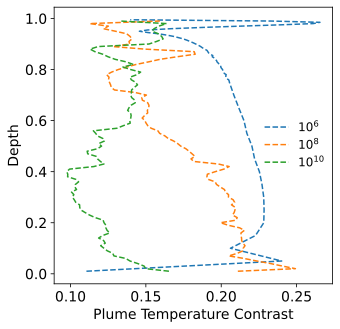

In [9]:
selected = [2,6,12];
plt.figure();
for i in selected:
    plt.plot(data[i]['dT_p'],data[i]['Depth'],'--',label=('{}'.format(fmt(int(RaU[i])))))
plt.ylabel('Depth')
plt.xlabel('Plume Temperature Contrast');
# plt.title('Temperature Contrast Between Plume and Background');
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.01, 0.5));
# plt.axhline(0.5,color='r');
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'deltaT_plume_selected.png',pad_inches=0.1,bbox_inches='tight');

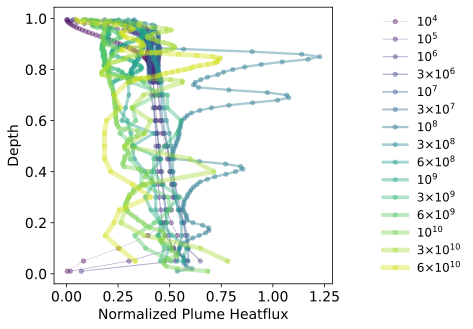

In [10]:
plt.figure();
for i in range(lenRa):
    plt.plot(data[i]['Q_p'],data[i]['Depth'],'.-',label=('{}'.format(fmt(int(RaU[i])))),\
             c=cmap(i/lenRa),linewidth=(i+1)/3,alpha=0.4)
plt.ylabel('Depth')
plt.xlabel('Normalized Plume Heatflux');
# plt.title('');
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));
# plt.axhline(0.99,color='r');
# plt.axhline(0.75,color='r');
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'plume heat flux.png',pad_inches=0.1,bbox_inches='tight');

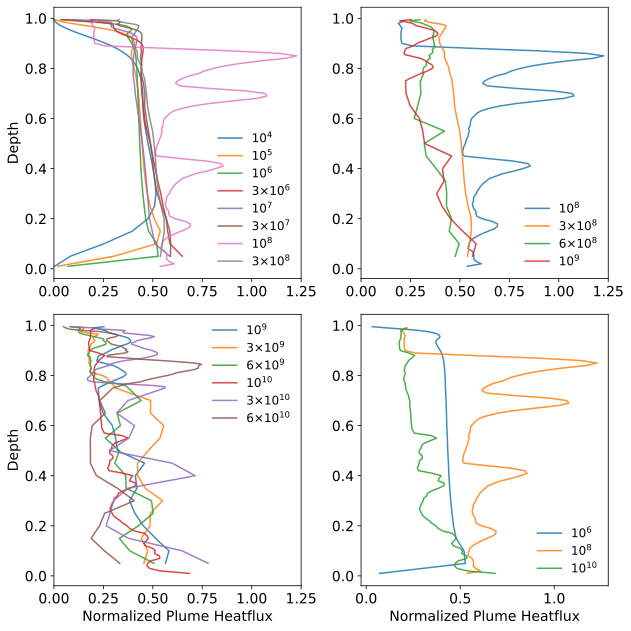

In [11]:
fig = plt.figure(figsize=(9,9))

selected = [0,1,2,3,4,5,6,7];
ax = plt.subplot(2, 2, 1)
for i in selected:
    plt.plot(data[i]['Q_p'],data[i]['Depth'],'-',label=('{}'.format(fmt(int(RaU[i])))),alpha=0.85)
plt.ylabel('Depth')
plt.legend(frameon=False,prop={'size': 12});
plt.xlim((0,1.25))

selected = [6,7,8,9];
ax = plt.subplot(2, 2,2)
for i in selected:
    plt.plot(data[i]['Q_p'],data[i]['Depth'],'-',label=('{}'.format(fmt(int(RaU[i])))),alpha=0.85)
plt.legend(frameon=False,prop={'size': 12});
plt.xlim((0,1.25))

selected = [9,10,11,12,13,14];
ax = plt.subplot(2, 2,3)
for i in selected:
    plt.plot(data[i]['Q_p'],data[i]['Depth'],'-',label=('{}'.format(fmt(int(RaU[i])))),alpha=0.85)
plt.ylabel('Depth')
plt.xlabel('Normalized Plume Heatflux');
plt.legend(frameon=False,prop={'size': 12});
plt.xlim((0,1.25))

selected = [2,6,12];
ax = plt.subplot(2, 2,4)
for i in selected:
    plt.plot(data[i]['Q_p'],data[i]['Depth'],'-',label=('{}'.format(fmt(int(RaU[i])))),alpha=0.85)
# plt.ylabel('Depth')
plt.xlabel('Normalized Plume Heatflux');
plt.legend(frameon=False,prop={'size': 12});
# plt.xlim((0,1.25))

fig.tight_layout()

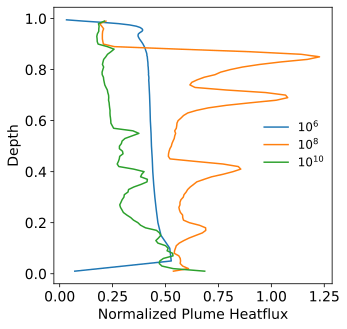

In [12]:
selected = [2,6,12];
plt.figure();
for i in selected:
    plt.plot(data[i]['Q_p'],data[i]['Depth'],'-',label=('{}'.format(fmt(int(RaU[i])))))
plt.ylabel('Depth')
plt.xlabel('Normalized Plume Heatflux');
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.01, 0.5));
# plt.axhline(0.5,color='r');
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'plume heat flux selected.png',pad_inches=0.1,bbox_inches='tight');

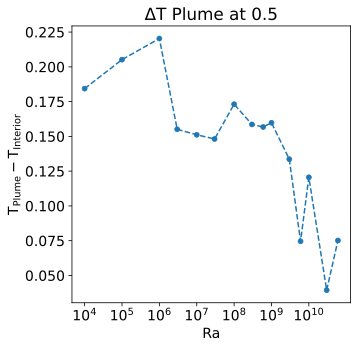

In [13]:
plt.rcParams['mathtext.default'] = 'regular'
plt.figure(figsize=(5,5))
depth = 0.5;
qpS = Data.loc[Data['Depth'] == depth]
plt.plot(qpS['Ra'],qpS['dT_p'],'.--',markersize=10)
plt.xscale('log');
plt.xticks(np.logspace(4,10,num=7));
plt.ylabel(r'$T_{Plume} - T_{Interior}$')
plt.xlabel('Ra');
# plt.grid()
plt.title('ΔT Plume at '+str(depth));
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'deltaT_plume_mid-depth.png',pad_inches=0.1,bbox_inches='tight');

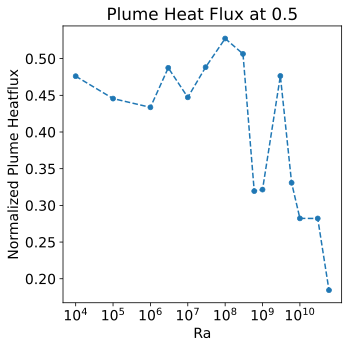

In [14]:
plt.figure(figsize=(5,5))
depth = 0.5;
qpS = Data.loc[Data['Depth'] == depth]
plt.plot(qpS['Ra'],qpS['Q_p'],'.--',markersize=10)
plt.xscale('log');
plt.xticks(np.logspace(4,10,num=7));
plt.ylabel('Normalized Plume Heatflux')
plt.xlabel('Ra');
# plt.grid()
plt.title('Plume Heat Flux at '+str(depth));
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'plume_heatflux_mid-depth.png',pad_inches=0.1,bbox_inches='tight');

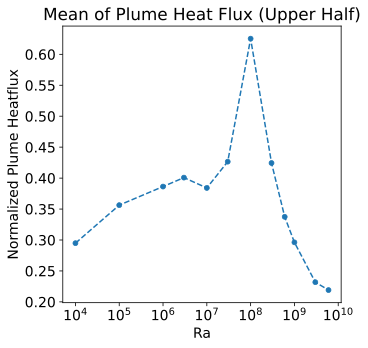

In [15]:
plt.figure(figsize=(5,5))
qp_ave = [];
for i in range(lenRa):
    qp_ave.append(Data.loc[(Data['Depth'] > 0.48) & (Data['Depth'] < 1) & (Data['Ra'] == RaU[i]),'Q_p'].mean())
plt.plot(RaU[:12],qp_ave[:12],'.--',markersize=10)
plt.xscale('log');
plt.xticks(np.logspace(4,10,num=7));
# plt.grid()
plt.ylabel('Normalized Plume Heatflux')
plt.xlabel('Ra');
plt.title('Mean of Plume Heat Flux (Upper Half)');
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'plume_heatflux_upper_half.png',pad_inches=0.1,bbox_inches='tight');

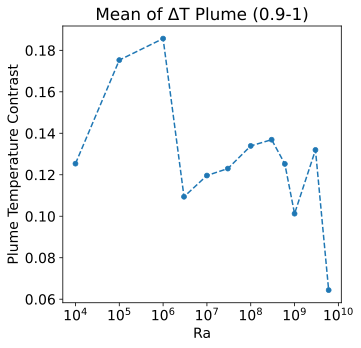

In [16]:
plt.figure(figsize=(5,5))
qp_ave = [];
for i in range(lenRa):
    qp_ave.append(Data.loc[(Data['Depth'] > 0.90) & (Data['Depth'] < 1) & (Data['Ra'] == RaU[i]),'dT_p'].mean())
plt.plot(RaU[:12],qp_ave[:12],'.--',markersize=10)
plt.xscale('log');
plt.xticks(np.logspace(4,10,num=7));
# plt.grid()
plt.ylabel('Plume Temperature Contrast')
plt.xlabel('Ra');
plt.title('Mean of ΔT Plume (0.9-1)');
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'plumeT_upper_half.png',pad_inches=0.1,bbox_inches='tight');

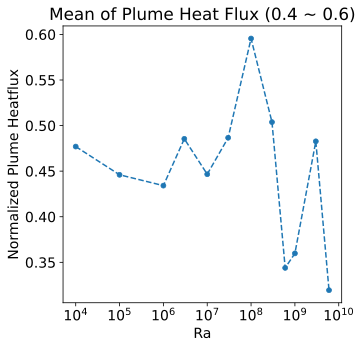

In [17]:
plt.figure(figsize=(5,5))
qp_ave = [];
for i in range(lenRa):
    qp_ave.append(Data.loc[(Data['Depth'] > 0.39) & (Data['Depth'] < 0.61) & (Data['Ra'] == RaU[i]),'Q_p'].mean())
plt.plot(RaU[:12],qp_ave[:12],'.--',markersize=10)
plt.xscale('log');
plt.xticks(np.logspace(4,10,num=7));
# plt.grid()
plt.ylabel('Normalized Plume Heatflux')
plt.xlabel('Ra');
plt.title('Mean of Plume Heat Flux (0.4 ~ 0.6)');

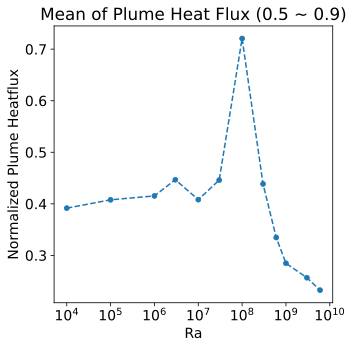

In [18]:
plt.figure(figsize=(5,5))
qp_ave = [];
for i in range(lenRa):
    qp_ave.append(Data.loc[(Data['Depth'] > 0.49) & (Data['Depth'] < 0.91) & (Data['Ra'] == RaU[i]),'Q_p'].mean())
plt.plot(RaU[:12],qp_ave[:12],'.--',markersize=10)
plt.xscale('log');
plt.xticks(np.logspace(4,10,num=7));
# plt.grid()
plt.ylabel('Normalized Plume Heatflux')
plt.xlabel('Ra');
plt.title('Mean of Plume Heat Flux (0.5 ~ 0.9)');

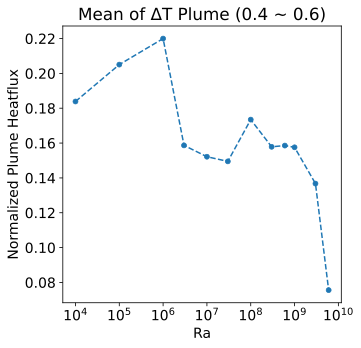

In [19]:
plt.figure(figsize=(5,5))
qp_ave = [];
for i in range(lenRa):
    qp_ave.append(Data.loc[(Data['Depth'] > 0.39) & (Data['Depth'] < 0.61) & (Data['Ra'] == RaU[i]),'dT_p'].mean())
plt.plot(RaU[:12],qp_ave[:12],'.--',markersize=10)
plt.xscale('log');
plt.xticks(np.logspace(4,10,num=7));
# plt.grid()
plt.ylabel('Normalized Plume Heatflux')
plt.xlabel('Ra');
plt.title('Mean of ΔT Plume (0.4 ~ 0.6)');